# Gaussian Mixture Models


An universally used generative unsupervised clustering is Gaussains Mixture Model (GMM) which is also known as "EM Clustering". The idea of GMM is very simple: for a given dataset, each point is generated by linear combination of multiple Gaussians.


## What is a Gaussian?

It is probability density function: It returns the probability oft that value occur


<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/450px-Empirical_Rule.PNG" width="350"/></center>

<center><img src="https://thecuriousastronomer.files.wordpress.com/2014/06/1000px-normal_distribution_pdf-svg.png" width="350"/></center>


<center><img src="http://i.imgur.com/iDNiL13.jpg" width="200"/></center>


The formula for a gaussian distribution - This is also called the probability density function. It's a function of a continuous random variable, whose integral across an interval gives the probability that the value of the variable lies within the same interval.

For *d dimension* the gaussian is defined as

<center>
$ N(x| \mu, \Sigma) = \frac{1}{2\pi^{d/2}\sqrt{\Sigma}} \exp{\frac{1}{2}(x-\mu)\Sigma^{-1}(x-\mu)^T}$
</center>

Where:  

* $x = (x_1, x_2, ..., x_d)$,  
* $\mu = (\mu_1, \mu_2, ..., \mu_d)$ is the mean and,   
* $\Sigma$ is the covariance matrix  

Covariance is a measure of how changes in one variable are associated with changes in a second variable (**multicolinearity**). Specifically, covariance measures the degree to which two variables are linearly associated. 

PS: For more about covariance matrix http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/


Bellows is an exmaple of bi-dimensional covariance matrix.  

<center>
$\boldsymbol\Sigma = \begin{bmatrix}
 \sigma^2(x_1) & cov(x_2,x_1) \\
 cov(x_1,x_2) &  \sigma^2(x_2)
\end{bmatrix}
$
</center>

$cov(x,y)=\frac{\sum_{i=1}^{N}(x_{i})(y_{i})}{N-1}$

**Note assume the $x$ and $y$ are zero mean**

The geometric interpretation can be seen in the graph bellow. It is just rotation in the main axes and the gaussian contours look likes ellipsoides.


<center>
$\boldsymbol\Sigma = \begin{bmatrix}
 \sigma^2(x_1) & cov \\
 cov &  \sigma^2(x_2)
\end{bmatrix}
$
</center>

<center><img src="./images/covariance_full.png" width="300"/></center>

It is an option (it is simplification to work with only the diagonal elements of the covariance matrix), despite the correlation between the dimensions.


<center>
$\boldsymbol\Sigma = \begin{bmatrix}
 \sigma^2(x_1) & 0.0 \\
 0.0 &  \sigma^2(x_2)
\end{bmatrix}
$
</center>

<center><img src="./images/covariance_diag.png" width="300"/></center>


<center>
$\boldsymbol\Sigma = \begin{bmatrix}
 \sigma^2 & 0.0 \\
 0.0 &  \sigma^2
\end{bmatrix}
$
</center>

<center><img src="./images/covariance_spherical.png" width="300"/></center>


### What are example of data you can model with a normal distribution?

<br>

- Physical quantities (height, weight, length, ...)  
- Test scores  
- Salary  
- Anything that is sum of many independent processes. This is the heart of the Central Limit Theorem (CLT).  


### Not Everything is Normal


<center><img src="images/abnormal.png" width="400"/></center>

Sometimes You Have 2 Gaussians

<center><img src="images/2_gaus.png" width="350"/></center>

Sometimes you need even more


## What is a Gaussian Mixture Model?

It's a probability distribution that consists of multiple probability distributions.

The probability given a mixture of gaussian is:

<center>
$P(x) = f(x|\theta) \equiv \sum_{j=1}^{K}{w_j N(x|\mu_j,\Sigma_j)}$
</center>

Where:  

* $K$ is the number of Gaussian in the mixture  
* $\theta = \{w_j,\mu_j,\Sigma_j\}$ for $j = 1,2,...,K$ are the parameter of the model  

<center><img src="images/gaussia_mixtures.png" width="500"/></center>

### Applications:

1. Unsupervised learn: Clusterize data
2. Visualization. Density plot in R
3. Bayesian classifier


### How to determine the parameters of the mixtures

How to determine the parameters $\theta$ that fits data from unkown distribtuion?  

Solution: Maximize the log likelihood of $P(X|\theta) = \prod_{i=1}^n f(x^{(i)}\mid\theta)$ using the EM (Expectation Maximization algorithm)

$
 \theta^* = arg\ MAX \{\hat\ell(\theta;X) \}
$


$
\hat\ell(\theta;X)=\frac1n \sum_{i=1}^n \ln f(x^{(i)}\mid\theta)
$


Where:  
* $n$ is the number of samples or points   
* $\hat\ell(\theta;X)$ is the log likelihood   
* $X = \{x^{(1)},x^{(2)},...,x^{(n)}\}$ are the d-dimensional points $x^{(i)} = (x^{(i)}_1,x^{(i)}_2, ..., x^{(i)}_d$)  

<center><img src="images/arg_max_log_like.png" width="400"/></center>

### Basic idea of the EM

An iterative method for finding maximum likelihood (MLE) or maximum a posteriori (MAP) estimates of parameters in statistical models,when the model depends on unobserved latent variables


#### Using 2 Gaussian and bi-dimensional data to explain

Two Normal distributions $N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$. 

There are 5 paramaters: 4 of the them are Normal distributions and 1 more for the probability of choosing one of them.

Let $w$ be the probability that the data comes from the first Normal, the parameter in this model is $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$.

The probability density function (PDF) is:

$$f(x | \theta) = w \  f_1(x \ | \  \mu_1, \sigma_1^2) + (1 - w) \  f_2 (x  \ | \  \mu_2, \sigma_2^2) $$  


1. Start with random gaussian with random parameters

<center><img src="images/init_gaussian.png" width="400"/></center>

2. Expectation 
    1. For each point determine of the probability of specific gaussian generate that data
    2. Assign the data for the gaussian with the hishest probability
    
<center><img src="images/em.png" width="400"/></center>

In **E-step** the data was splited in 2 subset:
1. $X^{<1>}$ all data points assigned to the first gaussian
2. $X^{<2>}$ all data points assigned to the second gaussian

    
3. Maximization
    1. For each gaussian update gaussian parameters by compute the parameters $\mu_j,\Sigma_j$ using the mean and covariance of the data assigned to that Gaussian
    2. $w_j$ is the number of data assigned to that Gaussian divide by the total number  
    

<center><img src="images/MAX.png" width="400"/></center>

* $\mu_1 = AVG(X^{<1>})$   
* $Var(X^{<1>})$  
* $ cov(X^{<1>}_1,X^{<2>}_2) $ 
* $w_1 = \frac{n_1}{n}$  where $n_1$ is the number of point in the first group .  

Repeat the same computation for the second Gaussian

<br>
<center><img src="http://people.revoledu.com/kardi/tutorial/EM/images/EM_algorithm.png" width="500"/></center>


## Simulation

Import Dependencies and test out a distribution graph


In [1]:
reset -fs

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sys import maxsize 

maxint = maxsize

sns.set_style("white")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=[], ax=None):
    ax = ax or plt.gca()
    
    if len(label) > 0:
        labels = label
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    ws = [value for g in guess for (param, value) in g.items() if param == 'w']
    w_factor = 0.2 /np.max(ws)
    for param in gmm:
        pos = param['mu']
        covar = param['Covar']
        w = param['w']
#         print('pos:{}'.format(pos))
#         print('covar: {}'.format(covar))
#         print('w: {}'.format(w))

        draw_ellipse(pos, covar, alpha=w * w_factor)


,label,x,y
40,1,0.607924,5.087887
194,2,4.386005,-0.313955
55,1,-0.724260,3.102723
71,1,-0.594676,4.465390
66,1,-0.245262,5.051939


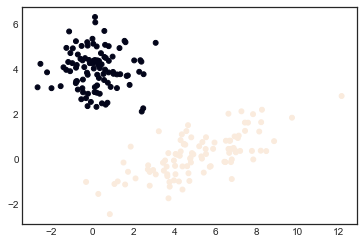

In [4]:
df = pd.read_csv("bi_dimensional_n_bi_modal_data.csv", index_col=False)
#show first 5 examples (in BTC)
df.sample(5).head(n=5)


fig = plt.figure()
plt.scatter(df['x'], df['y'], 24, c=df['label'])

### Initialization

,label,x,y
99,1,1.017723,3.800358
40,1,0.607924,5.087887
165,2,4.124404,0.208306
19,1,-0.086206,2.551984
146,2,4.849876,0.277482


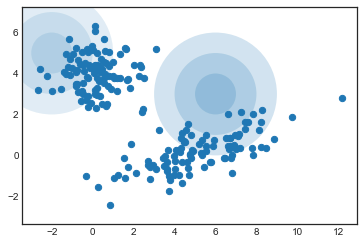

In [5]:
guess = [{ 'mu': np.asarray([-2.0,5.0]),
          'Covar': np.asarray([ [1.0, 0], [0, 1.0] ]),
          'w': 0.4 },  
          {'mu': np.asarray([6.0,3.0]),
          'Covar': np.asarray([ [1.0, 0], [0, 1.0] ]),
          'w': 0.6}]


# loop until parameters converge
shift = maxint
epsilon = 0.01
iters = 0
df_copy = df.copy()

df_copy.sample(5).head(5)

labels = df_copy.label
X = df[['x','y']].values
plot_gmm(guess, X)

### Expectation

In [8]:
# Gaussian probability density function
def gaussian_prob(x, mu, covar):

    covar_inv = np.linalg.inv(covar)
    
    d = mu.shape[0]
    det_covar = np.linalg.det(covar)
    norm_const = 1.0/np.sqrt(np.power(2*np.pi,d))/det_covar
  
    a = x - mu
    a_times_covar_inv = np.matmul(a, covar_inv)

    p = norm_const* np.exp(-0.5* np.matmul(a_times_covar_inv,a.transpose()))
    
    return p

# assign every data point to its most likely cluster
def expectation(dataFrame, gmm):
    
    
    param = gmm[0]  
    mu1 = param['mu']
    covar1 = param['Covar']
    w1 = param['w']
    
    param = gmm[1]  
    mu2 = param['mu']
    covar2 = param['Covar']
    w2 = param['w']

    for i in range(dataFrame.shape[0]):

        x = df[['x','y']].values[i]
     
        # probability that a point came from a Guassian with given parameters
        p_cluster1 = w1*gaussian_prob(x, mu1, covar1)
        p_cluster2 = w2*gaussian_prob(x, mu2, covar2)


        if p_cluster1 > p_cluster2:
            dataFrame['label'][i] = 1
        else:
            dataFrame['label'][i] = 2
            
    return dataFrame

In [14]:
%%time
iters += 1

# E-step
updated_labels = expectation(df_copy, guess)

CPU times: user 5.17 s, sys: 11.6 ms, total: 5.18 s
Wall time: 5.18 s


,label,x,y
62,1,0.635953,2.429577
86,1,-1.192609,4.326030
94,1,0.879998,3.218889
178,2,4.211926,-0.981922
88,2,3.078169,5.177676


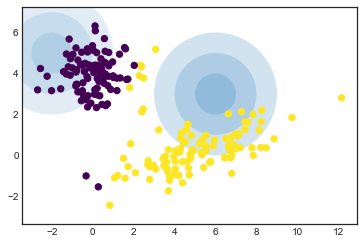

In [15]:
updated_labels.sample(5).head(5)

labels = updated_labels.label

X = df[['x','y']].values
plot_gmm(guess, X, label=labels)

###  Maximization

In [16]:
# update estimates of lambda, mu and sigma
def maximization(dataFrame, gmm):
    
    points_assigned_to_cluster1 = dataFrame[dataFrame['label'] == 1]
    points_assigned_to_cluster2 = dataFrame[dataFrame['label'] == 2]
    
    percent_assigned_to_cluster1 = len(points_assigned_to_cluster1) / float(len(dataFrame))
    percent_assigned_to_cluster2 = 1 - percent_assigned_to_cluster1
    
    X1 = points_assigned_to_cluster1[['x','y']].values
    mu1 = np.mean(X1,axis=0)
    covar1 = np.cov(X1.transpose())
    
    X2 = points_assigned_to_cluster2[['x','y']].values
    mu2 = np.mean(X2,axis=0)
    covar2 = np.cov(X2.transpose())
   

    gmm = [{ 'mu': mu1,
          'Covar': covar1,
          'w': percent_assigned_to_cluster1},  
          {'mu': mu2,
          'Covar': covar2,
          'w': percent_assigned_to_cluster2}]
    
    return gmm

# get the distance between points
# used for determining if params have converged
def distance(old_params, new_params):

    dist = 0
    
    dmu1 = np.linalg.norm(new_params[0]['mu'] - old_params[0]['mu'])
    dmu2 = np.linalg.norm(new_params[1]['mu'] - old_params[1]['mu'])
    
    return [dmu1,dmu2]

In [17]:
%%time

# M-step
new_gmm = maximization(updated_labels, guess)

# see if our estimates of mu have changed
# could incorporate all params, or overall log-likelihood
mu_shift = distance(guess, new_gmm)


CPU times: user 2.76 ms, sys: 716 µs, total: 3.47 ms
Wall time: 2.7 ms


New gmm: [{'mu': array([-0.03664249,  3.92240438]), 'Covar': array([[0.83120001, 0.03521156],
       [0.03521156, 1.33671694]]), 'w': 0.47}, {'mu': array([4.98578426, 0.46797474]), 'Covar': array([[4.48775416, 0.53599296],
       [0.53599296, 1.71047629]]), 'w': 0.53}]
mu_shift:[2.2396394832597712, 2.7275970215386933]


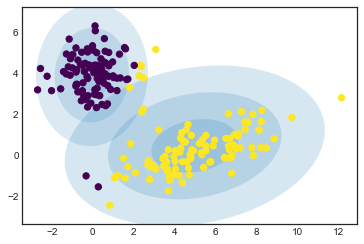

In [18]:
print('New gmm: {}'.format(new_gmm))
print('mu_shift:{}'.format(mu_shift))

#X = df[['x','y']].values
plot_gmm(new_gmm, X, label=labels)


In [19]:
%%time
iters += 1

# E-step
updated_labels = expectation(df_copy, new_gmm)

# M-step
prv_gmm = new_gmm.copy()
new_gmm = maximization(updated_labels, prv_gmm)

# see if our estimates of mu have changed
# could incorporate all params, or overall log-likelihood
mu_shift = distance(prv_gmm, new_gmm)


CPU times: user 5.34 s, sys: 14.1 ms, total: 5.36 s
Wall time: 5.36 s


New gmm: [{'mu': array([0.11182166, 4.042304  ]), 'Covar': array([[1.14667221, 0.06535323],
       [0.06535323, 0.73443212]]), 'w': 0.49}, {'mu': array([5.04010014, 0.21730923]), 'Covar': array([[4.75322741, 1.29714424],
       [1.29714424, 0.94994442]]), 'w': 0.51}]
mu_shift:[0.19083375960460114, 0.2564827667884491]


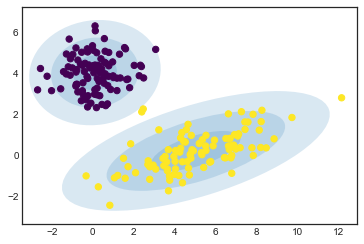

In [20]:
print('New gmm: {}'.format(new_gmm))
print('mu_shift:{}'.format(mu_shift))

#X = df[['x','y']].values
plot_gmm(new_gmm, X, label=labels)


Summary
----

- Gaussian Mixture Models (GMM) take our old friend the Gaussian and add another Gaussian(s).
- This allows us to model more complex data.
- We fit a GMM with the Expectation–Maximization (EM) Algorithm.
- Expectation–Maximization (EM) Algorithm is a series of steps to find good parameter estimates when there are latent variables.
- EM steps:
    1. Initialize the parameter estimates
    2. Given the current parameter estimates, find the min log likelihood for Z (data+latent variables)
    3. Given the current data, find better parameter estimates
    3. Repeat steps 2 & 3
- EM can be used beyond GMM
- GMM work well but you have to guess the number of Gaussians. Kernel Density Estimation (KDE) does __not__ require that kind of guessing 

<br>
<br> 
<br>

----